In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data.shape

NameError: name 'data' is not defined

In [2]:
data = pd.read_csv(r"C:\Users\kspav\Desktop\DM_churn\telecom.csv")
data.head().T

NameError: name 'pd' is not defined

In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Converting Total Charges to numerical data type
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        13
Churn                0
dtype: int64

In [6]:
data['TotalCharges'].dtypes

dtype('float64')

In [7]:
data.groupby('Churn')[['MonthlyCharges', 'tenure', 'TotalCharges']].agg(['min', 'max', 'mean'])

MonthlyCharges                    tenure                TotalCharges  \
                 min     max       mean    min max       mean          min   
Churn                                                                        
No             18.25  118.75  61.257275      0  72  37.572754        18.80   
Yes            18.85  118.35  74.459957      1  72  17.988223        18.85   

                             
           max         mean  
Churn                        
No     8672.45  2554.441923  
Yes    8684.80  1533.334547

In [9]:
df = pd.DataFrame(data)
print(df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [18]:
# drop all rows with any NaN and NaT values
data = df.dropna()
print(data)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
5     9305-CDSKC  Female              0      No         No       8   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [59]:
# Calculate the missing value counts for each column
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [60]:
import plotly.graph_objs as go
import plotly.offline as po

# Visualization of Total Customer Churn

churn_labels = data["Churn"].value_counts().keys().tolist()
churn_values = data["Churn"].value_counts().values.tolist()

plot_data= [go.Pie(labels = churn_labels,values = churn_values,marker = dict(colors = [ 'yello', 'Ivory'],line = dict(color = "white",width = 1.5)),rotation = 90,hoverinfo = "label+value+text",hole = .6)
]

# Total Number of Customers that will churn
count_churn_yes = data[data.Churn == 'Yes'].shape[0]
# Total Number of Customers that will not churn
count_churn_no = data[data.Churn == 'No'].shape[0]

# Percentage of customer that will churn
percent_churn_yes = round((count_churn_yes / (count_churn_yes + count_churn_no) * 100),2)
# Percentage of customer that will not churn (retain)
percent_churn_no = round((count_churn_no / (count_churn_yes + count_churn_no) * 100 ),2)


plot_layout = go.Layout(dict(title = f'{percent_churn_yes} % ({count_churn_yes} number) of the customers will churn and {percent_churn_no} % ({count_churn_no} number) of the customers will not churn',
                   plot_bgcolor = "rgb(243,243,243)",
                  paper_bgcolor = "rgb(243,243,243)",))


fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

Text(0.5, 1.0, 'Gender and Customer Churn connection')

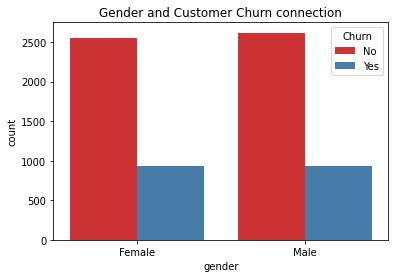

In [38]:
ax = sns.countplot(x='gender', hue='Churn', data=data, palette="Set1")
ax.set_title('Gender and Customer Churn connection')

Text(0.5, 1.0, 'SeniorCitizens have higher customer churn')

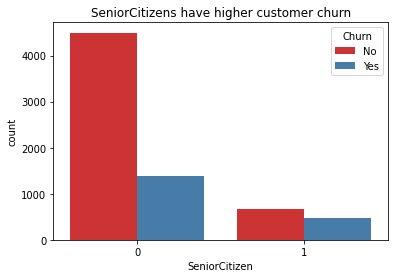

In [41]:
ax = sns.countplot(x= 'SeniorCitizen', hue='Churn', data=data, palette="Set1")
ax.set_title(f'SeniorCitizens have higher customer churn')

Text(0.5, 1.0, 'Effect of internet service on customer churn')

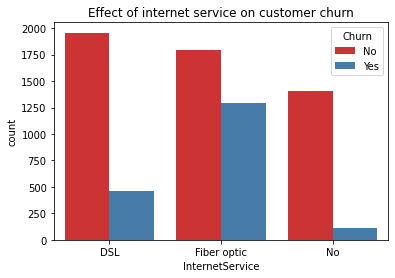

In [43]:
ax = sns.countplot(x= 'InternetService', hue='Churn', data=data, palette="Set1")
ax.set_title(f'Effect of internet service on customer churn')

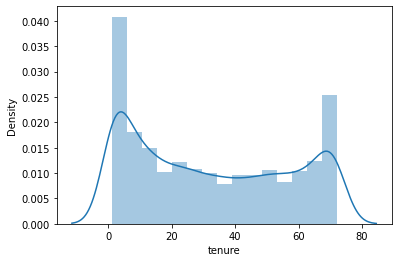

In [46]:
ax = sns.distplot(data['tenure'])

c:\users\91900\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



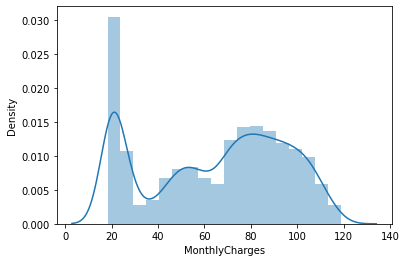

In [47]:
ax=sns.distplot(data['MonthlyCharges']);

Text(0.5, 1.0, 'Contract')

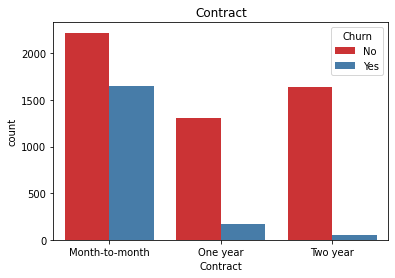

In [48]:
ax = sns.countplot(x= 'Contract', hue='Churn', data=data, palette="Set1")
ax.set_title(f'Contract')

Text(0.5, 0, '0-No, 1-Yes')

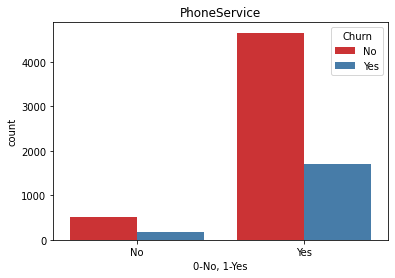

In [54]:
ax = sns.countplot(x= 'PhoneService', hue='Churn', data=data, palette="Set1")
ax.set_title(f'PhoneService')
plt.xlabel('0-No, 1-Yes')

Text(0.5, 0, '0-No, 1-Yes')

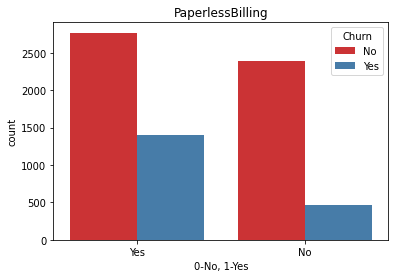

In [55]:
ax = sns.countplot(x= 'PaperlessBilling', hue='Churn', data=data, palette="Set1")
ax.set_title(f'PaperlessBilling')
plt.xlabel('0-No, 1-Yes')

In [62]:
#Data Preprocessing
x = data.drop('customerID', axis = 'columns')
x.shape

(7030, 20)

In [64]:
x.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [65]:
x.TotalCharges.unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [67]:
x[x.TotalCharges == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [73]:
%matplotlib inline

#For Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

atts_scaling = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
x[atts_scaling] = scaler.fit_transform(x[atts_scaling]) # Fit to data, then transform it
x[atts_scaling].describe()

,tenure,MonthlyCharges,TotalCharges
count,7030.000000,7030.000000,7030.000000
mean,0.442672,0.463081,0.261304
std,0.345668,0.299406,0.261537
min,0.000000,0.000000,0.000000
25%,0.112676,0.172139,0.044204
50%,0.394366,0.518408,0.159090
75%,0.760563,0.712438,0.435608
max,1.000000,1.000000,1.000000


In [77]:
xtrain, xtest, ytrain, ytest = train_test_split(x, x['Churn'], test_size= 0.3, random_state= 0)

In [78]:
xtrain.shape


(4921, 20)

In [79]:
xtest.shape

(2109, 20)

In [101]:
def standardizeDatset(xtrain,xtest):
    scaler=StandardScaler()
    xtrain=scaler.fit_trandform(xtrain)
    xtest=scaler.transform(xtest)
    
    pca=PCA(n_components=0.5)
    xtrainStd=pca.fit_transform(xtrain)
    xtestStd=pca.transform(xtest)
    return xtrainStd, xtestStd

In [102]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
y_pred_train_dt = decision_tree.predict(X_train)
dt_as = metrics.accuracy_score(y_test, y_pred_dt)
dt_as_train = metrics.accuracy_score(y_train, y_pred_train_dt)

print(f"Accuracy score for test data : {dt_as}")
print(f"Accuracy score for train data : {dt_as_train}")

In [103]:
xtestStd[:3,:]

NameError: name 'xtestStd' is not defined